In [3]:
import seaborn as sns 
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics, model_selection, svm

df = pd.read_csv("titanic-passengers.csv", delimiter=";")


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
f = df.Age.mode()

In [7]:
df.Age.isnull()
df.Age.fillna(24, inplace=True)


In [8]:
df.Age.isnull().sum()

0

In [9]:
df.isnull().sum()
df.Survived

0       No
1       No
2       No
3       No
4       No
      ... 
886    Yes
887     No
888     No
889     No
890    Yes
Name: Survived, Length: 891, dtype: object

In [10]:
clenup = {"Yes": 1, "No": 0 }
df.Survived.replace(clenup, inplace=True)
df.Survived
df["Sex"]=df["Sex"].map({"male": 1, "female": 0})


In [11]:
df.Sex

0      1
1      1
2      1
3      0
4      1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Sex, Length: 891, dtype: int64

In [12]:
x = df[['Sex','SibSp','Pclass']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.84


<AxesSubplot:xlabel='Age', ylabel='Survived'>

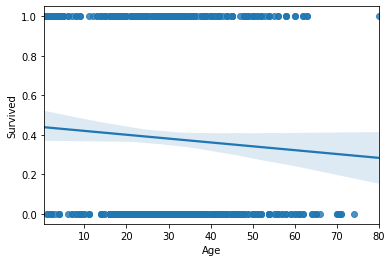

In [13]:
sns.regplot(x='Age',y='Survived',data=df)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

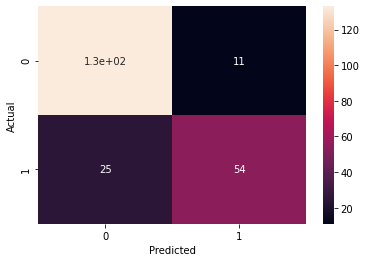

In [14]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [25]:
def plot_roc(model, x , y):

    fpr, tpr, threshold = metrics.roc_curve(y, x)
    

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


plot_roc(confusion_matrix, x_test, y_test)


ValueError: y should be a 1d array, got an array of shape (223, 3) instead.